###### BUSINFO 704 – Data Wrangling Project Report 
###### Group Members: Alice, Shawn, Shilpa, Pratik & Aiswarya



**Dataset Used - Group 5-701(View Only): [Access via Google Drive](https://drive.google.com/drive/folders/18RCbNMrlhhdJ-Xrtuek6xUCIUrkrxhJu?usp=drive_link)**

**[GitHub Repository for the analysis](https://github.com/shawn1984mendonca/Group-5-701-Project-Files)**


# **Introduction**

In today’s interconnected world, education is crucial for national growth and developing talent. As countries increase spending on education, it’s important to know if this leads to students staying in their home countries. At the same time, more students are studying abroad in some regions, raising concerns about access, quality, and fairness in local education systems.

This study looks at how government spending, education inequality, and international student movement combine to shape a country’s educational success. By analysing investment levels, student flows in and out, and overall performance, we identify which countries keep and attract talented students, and which do not. These findings help policymakers design fairer education systems and assist international organizations in understanding global student trends.
The goal is to identify which countries are succeeding, not just in attracting international students, but also in retaining their own talent.
We used five global datasets and developed a unified approach to compare countries on key factors like GDP per capita, education spending, inequality, and student movement.
At the core of this project, we explored three main questions:
1.	Which countries show the greatest mismatch between education investment and actual student retention?
2.	Do countries with high education inequality experience higher outbound student mobility?
3.	Which countries successfully attract international students and retain their own talent?

In [153]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Data Wrangling Details**

### **Overview**

In this section, we document each step of the data wrangling process, including individual dataset audits, transformations, the merging process, and final data storage. All Python code used is included so that peers can replicate the process end-to-end.

### 📁 Dataset 1: **World GDP 2020**

* **Origin**: [Kaggle – GDP among world](https://www.kaggle.com/datasets/darknez/gdp-among-world) 
* **Format**: CSV
* **Structure**: 184 countries x 18 rows
* Each row represents a country with multiple economic indicators for 2020.
* **Key Variables**: `Country`, `GDP Per Capita`

**Initial Audit**:

* String-based percentages in fields like Growth Rate and World Percentage needed conversion.
* GDP values (IMF/UN) were inconsistently formatted (e.g., $1.2 Tn, $230 Bn) and required custom conversion logic.
* Comma-separated values in Land Area and Area were treated as strings.
* Some columns like Anthem and Government were largely missing and dropped.
* Missing values found in Population Rank — essential rows were removed.
* Column names were cleaned and clarified for readability.

In [154]:
# Load and preview dataset
gdp_df = pd.read_csv("World_GDP_2020.csv")
display(gdp_df.head())

,Country,Population Rank,Growth Rate,World Percentage,Density,Land Area,2020 Population Rank,2020 World Percentage,2020 Growth Rate,Area,Capital City,Region,Subregion,Anthem,Government,GDP (IMF),GDP (UN),GDP Per Capita
0,Japan,11.0,-0.30%,1.62%,334.66,"364,555",11,1.62%,-0.30%,"377,930",Tokyo,Asia,Eastern Asia,Japan,Japan,$5.50 Tn,$4.94 Tn,"$43,450.14"
1,Mauritania,127.0,2.74%,0.06%,4.51,"1,030,700",127,0.06%,2.74%,"1,030,700",Nouakchott,Africa,Western Africa,NaN,NaN,$5.70 Bn,$4.67 Bn,"$1,225.25"
2,Cape Verde,172.0,1.10%,0.01%,137.86,"4,030",172,0.01%,1.10%,"4,033",Praia,Africa,Western Africa,NaN,NaN,$2.21 Bn,$1.64 Bn,"$3,971.32"
3,Tunisia,79.0,1.06%,0.15%,72.24,"155,360",79,0.15%,1.06%,"163,610",Tunis,Africa,Northern Africa,NaN,NaN,$35.15 Bn,$41.70 Bn,"$2,974.12"
4,Eritrea,133.0,1.41%,0.05%,30.16,"101,000",133,0.05%,1.41%,"117,600",Asmara,Africa,Eastern Africa,NaN,NaN,$8.12 Bn,$5.41 Bn,"$2,288.5"


In [155]:
# Inspect data types
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                184 non-null    object 
 1   Population Rank        182 non-null    float64
 2   Growth Rate            182 non-null    object 
 3   World Percentage       182 non-null    object 
 4   Density                184 non-null    float64
 5   Land Area              182 non-null    object 
 6   2020 Population Rank   184 non-null    int64  
 7   2020 World Percentage  184 non-null    object 
 8   2020 Growth Rate       184 non-null    object 
 9   Area                   184 non-null    object 
 10  Capital City           184 non-null    object 
 11  Region                 184 non-null    object 
 12  Subregion              184 non-null    object 
 13  Anthem                 26 non-null     object 
 14  Government             78 non-null     object 
 15  GDP (I

In [156]:
# Check for missing values across all columns
gdp_df.isnull().sum()

Country                    0
Population Rank            2
Growth Rate                2
World Percentage           2
Density                    0
Land Area                  2
2020 Population Rank       0
2020 World Percentage      0
2020 Growth Rate           0
Area                       0
Capital City               0
Region                     0
Subregion                  0
Anthem                   158
Government               106
GDP (IMF)                  0
GDP (UN)                   0
GDP Per Capita             0
dtype: int64

In [157]:
# Step 1: Drop columns with excessive missing data
gdp_df.drop(columns=['Anthem', 'Government'], inplace=True)

# Step 2: Drop rows missing essential ranking information
gdp_df = gdp_df.dropna(subset=['Population Rank'])

# Step 3: Clean percentage columns and convert to float datatype
percentage_cols = ['Growth Rate', 'World Percentage', '2020 World Percentage', '2020 Growth Rate']
for col in percentage_cols:
    gdp_df[col] = gdp_df[col].str.replace('%', '').astype(float)

# Step 4: Convert population rank to integer
gdp_df['Population Rank'] = gdp_df['Population Rank'].astype(int)

# Step 5: Clean comma-separated numbers
gdp_df['Land Area'] = gdp_df['Land Area'].str.replace(',', '').astype(int)
gdp_df['Area'] = gdp_df['Area'].str.replace(',', '').astype(int)

# Step 6: Create custom function to convert GDP fields
def convert_gdp(val):
    try:
        if isinstance(val, str):
            val = val.replace('$', '').replace(',', '').strip()
            if val in ['-', '']:
                return np.nan
            elif 'Tn' in val:
                return float(val.replace('Tn', '')) * 1e12
            elif 'Bn' in val:
                return float(val.replace('Bn', '')) * 1e9
            else:
                return float(val)
        elif isinstance(val, (int, float)):
            return float(val)
    except:
        return np.nan

# Apply the conversion
gdp_df['GDP (IMF) [$]'] = gdp_df['GDP (IMF)'].apply(convert_gdp)
gdp_df['GDP (UN) [$]'] = gdp_df['GDP (UN)'].apply(convert_gdp)

# Clean GDP Per Capita
gdp_df['GDP Per Capita'] = gdp_df['GDP Per Capita'].str.replace('$', '').str.replace(',', '').astype(float)

# Drop original GDP text columns
gdp_df.drop(columns=['GDP (IMF)', 'GDP (UN)'], inplace=True)

# Step 7: Rename columns for clarity
gdp_df.rename(columns={
    'Growth Rate': 'Growth Rate (%)',
    'World Percentage': 'World Population (%)',
    '2020 World Percentage': '2020 World Population (%)',
    '2020 Growth Rate': '2020 Growth Rate (%)',
    'GDP Per Capita': 'GDP Per Capita [$]'
}, inplace=True)

In [158]:
print("Cleaning complete. Final dataset shape:", gdp_df.shape)
print("\nData types:\n", gdp_df.dtypes)

Cleaning complete. Final dataset shape: (182, 16)

Data types:
 Country                       object
Population Rank                int32
Growth Rate (%)              float64
World Population (%)         float64
Density                      float64
Land Area                      int32
2020 Population Rank           int64
2020 World Population (%)    float64
2020 Growth Rate (%)         float64
Area                           int32
Capital City                  object
Region                        object
Subregion                     object
GDP Per Capita [$]           float64
GDP (IMF) [$]                float64
GDP (UN) [$]                 float64
dtype: object


In [159]:
# Unique country count and total records
print("\n Unique Countries Count:", gdp_df['Country'].nunique())
print(" Total Records:", gdp_df.shape[0])


 Unique Countries Count: 182
 Total Records: 182


### 📁 Dataset 2: **OECD – International Student Mobility (Inbound)**

* **Origin**: [OECD Indicator – International Student Mobility](https://www.oecd.org/en/data/indicators/international-student-mobility.html)
* **Format**: CSV
* **Structure**: 37 countries x 2 columns
* Shows the percentage of enrolled tertiary students who are international students in each country for the year **2020**.
* **Key Variables**: `Country`, `International student mobility %`

**Initial Audit**:

* Dataset included two header rows, so we skipped the first two rows while reading.
* Column names were long/unclear → renamed for simplicity.
* No missing values.

In [160]:
# Load dataset, skipping header rows
inbound_df = pd.read_csv("International_Student_Mobility_2020.csv", skiprows=2)

# Rename columns for clarity
inbound_df.columns = ["Country", "Inbound Student %"]

# Preview data
display(inbound_df.head())

# Check structure
inbound_df.info()

# Sort the data for visualization
inbound_df_sorted = inbound_df.sort_values(by='Inbound Student %', ascending=False)

,Country,Inbound Student %
0,Luxembourg,48.388
1,Australia,25.995
2,United Kingdom,20.148
3,Switzerland,18.143
4,Austria,17.977


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            37 non-null     object 
 1   Inbound Student %  37 non-null     float64
dtypes: float64(1), object(1)
memory usage: 724.0+ bytes


#### **Visualization – Bar Chart of Inbound Student Percentage**

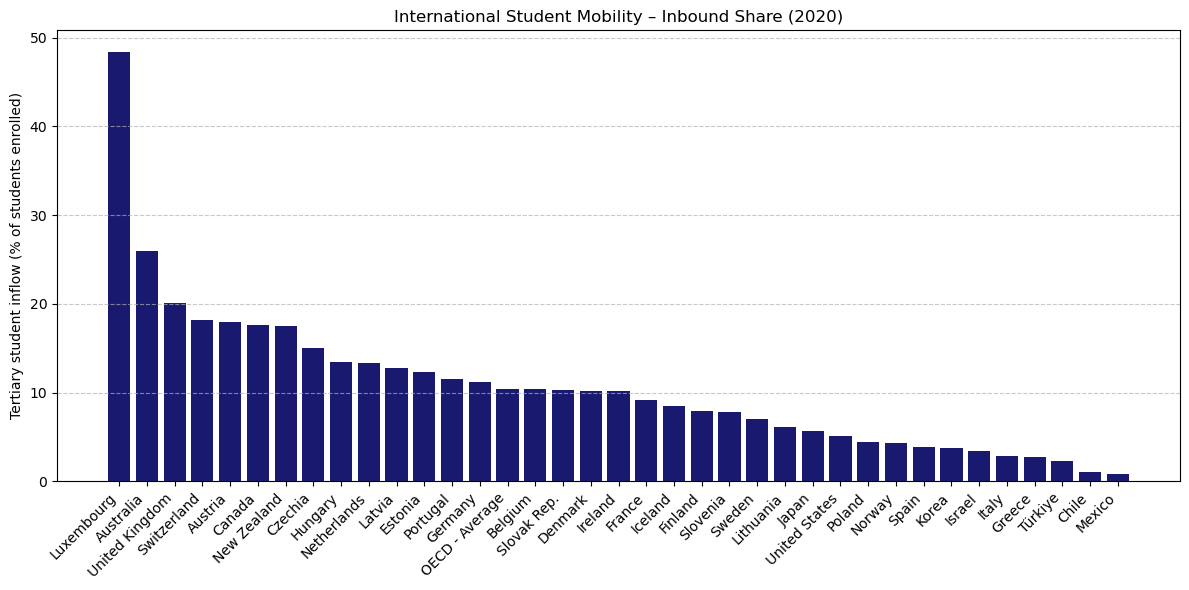

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(inbound_df_sorted['Country'], inbound_df_sorted['Inbound Student %'], color='midnightblue')

# Formatting
plt.xticks(rotation=45, ha='right')
plt.ylabel('Tertiary student inflow (% of students enrolled)')
plt.title('International Student Mobility – Inbound Share (2020)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### **Chart Insight:**

* Countries like Luxembourg, Australia, and New Zealand show the **highest inflow of international students**, signaling strong global education branding and demand.


In [162]:
# Unique country count and total records
print("\n Unique Countries Count:", inbound_df['Country'].nunique())
print(" Total Records:", inbound_df.shape[0])


 Unique Countries Count: 37
 Total Records: 37


### 📁 Dataset 3: **Share of Students Studying Abroad (Outbound)**

* **Origin**: [Our World in Data – Share of Students Studying Abroad](https://ourworldindata.org/grapher/share-of-students-studying-abroad?time=2020)
* **Format**: CSV
* **Structure**: 117 countries x 4 columns
* Year: **2020** focused
* Each row shows the percentage of tertiary students from a country studying outside their home nation.
* **Key Variables**: `Entity` (Country), `Share of students studying abroad`

**Initial Audit**:

* Missing values in some countries.
* Country field requires matching to GDP and OECD datasets.
* Some entries had missing Code values — filtered out.
* Data includes multiple years (1997–2022) → filtered for 2020 only.



In [163]:
# Load dataset
outbound_df = pd.read_csv("Share_of_students_studying_abroad_1997-2022.csv")
display(outbound_df.head())

,Entity,Code,Year,Share of students studying abroad
0,Afghanistan,AFG,2003,9.72414
1,Afghanistan,AFG,2004,9.44669
2,Afghanistan,AFG,2009,5.80629
3,Afghanistan,AFG,2011,9.68886
4,Afghanistan,AFG,2014,7.46959


In [164]:
# Check structure and data types
outbound_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             3642 non-null   object 
 1   Code                               3147 non-null   object 
 2   Year                               3642 non-null   int64  
 3   Share of students studying abroad  3642 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 113.9+ KB


In [165]:
# Filter for 2020
outbound_df = outbound_df[outbound_df['Year'] == 2020]

# Drop rows with missing country code
outbound_df = outbound_df.dropna(subset=['Code'])

# Rename columns for clarity
outbound_df = outbound_df[['Entity', 'Share of students studying abroad']]
outbound_df.columns = ['Country', 'Outbound Student %']
display(outbound_df.head())

,Country,Outbound Student %
6,Afghanistan,7.72899
29,Albania,9.02751
51,Algeria,2.07809
68,Andorra,247.49716
114,Argentina,0.28842


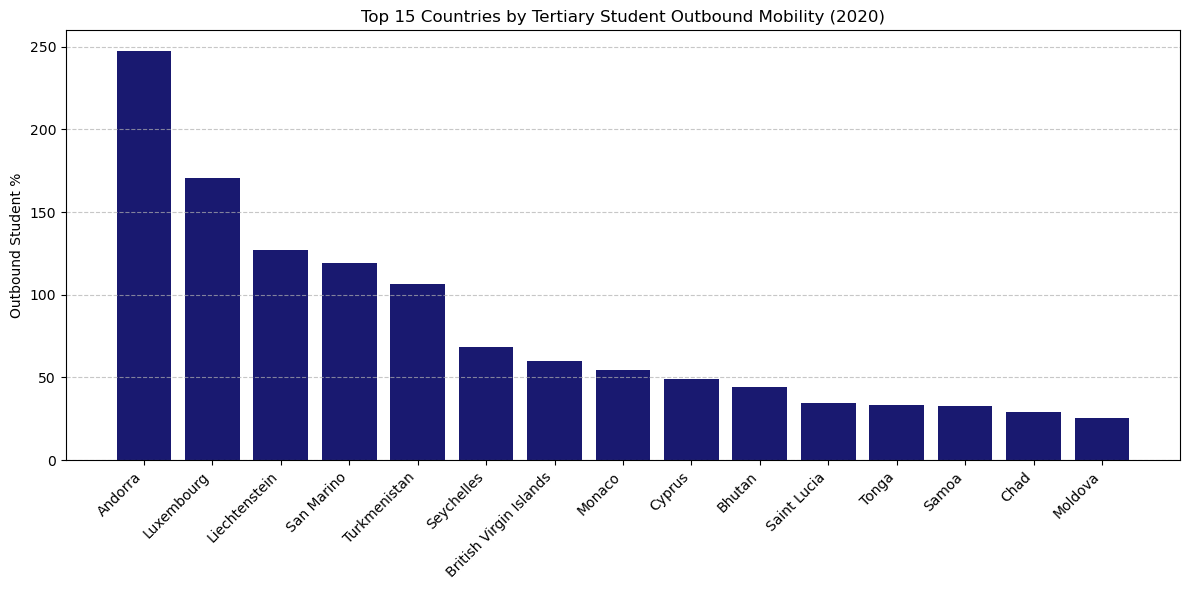

In [166]:
# Sort and get top 15 countries
top_outbound = outbound_df.sort_values(by='Outbound Student %', ascending=False).head(15)

#Plot
plt.figure(figsize=(12, 6))
plt.bar(top_outbound['Country'], top_outbound['Outbound Student %'], color='midnightblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Outbound Student %')
plt.title('Top 15 Countries by Tertiary Student Outbound Mobility (2020)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### **Chart Insight:**

Small countries like **Andorra, Luxembourg, and Liechtenstein** top outbound rates due to limited local university options and strong regional mobility.
High outbound doesn’t always mean failure — it often reflects **size, geography, and cross-border education reliance.**

In [167]:
# Unique country count and total records
print("\n Unique Countries Count:", outbound_df['Country'].nunique())
print(" Total Records:", outbound_df.shape[0])


 Unique Countries Count: 122
 Total Records: 122


### 📁 Dataset 4: **Inequality in Education Around the World**

* **Origin**: [Kaggle – Education Inequality](https://www.kaggle.com/datasets/iamsouravbanerjee/inequality-in-education-around-the-world/data)
* **Format**: CSV
* **Structure**: 195 countries x 17 columns
* Covers annual inequality scores from **2010 to 2021**
* Contains annual education inequality indicators
* **Key Variables**: `Country`, `HDI Rank`, `Inequality in Education (2020)`

**Initial Audit**:

* The dataset is in wide format — required filtering for the 2020 column.
* Some countries had missing inequality values and were dropped.
* HDI Rank was converted to integer for easier sorting and merging.

In [168]:
# Load dataset
inequality_df = pd.read_csv("Inequality_in_Education_2020.csv")
display(inequality_df.head())

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


In [169]:
# Check structure and data types
inequality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ISO3                            195 non-null    object 
 1   Country                         195 non-null    object 
 2   Human Development Groups        191 non-null    object 
 3   UNDP Developing Regions         151 non-null    object 
 4   HDI Rank (2021)                 191 non-null    float64
 5   Inequality in Education (2010)  137 non-null    float64
 6   Inequality in Education (2011)  150 non-null    float64
 7   Inequality in Education (2012)  157 non-null    float64
 8   Inequality in Education (2013)  165 non-null    float64
 9   Inequality in Education (2014)  168 non-null    float64
 10  Inequality in Education (2015)  168 non-null    float64
 11  Inequality in Education (2016)  168 non-null    float64
 12  Inequality in Education (2017)  168 

In [170]:
# Filter to retain only the columns you need for Year 2020
ineq_2020 = inequality_df[['Country', 'HDI Rank (2021)', 'Inequality in Education (2020)']].copy()

# Drop rows with missing value
ineq_2020 = ineq_2020.dropna(subset=['Inequality in Education (2020)'])

# Rename columns
ineq_2020.rename(columns={
    'HDI Rank (2021)': 'HDI Rank',
    'Inequality in Education (2020)': 'Education Inequality'
}, inplace=True)

# Convert HDI Rank to integer
ineq_2020['HDI Rank'] = ineq_2020['HDI Rank'].astype('Int64')

# Final preview
ineq_2020.head()


,Country,HDI Rank,Education Inequality
0,Afghanistan,180,45.365170
1,Angola,148,34.171440
2,Albania,67,12.333440
3,Andorra,40,10.008154
4,United Arab Emirates,26,12.634355


In [171]:
ineq_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 0 to 194
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               176 non-null    object 
 1   HDI Rank              176 non-null    Int64  
 2   Education Inequality  176 non-null    float64
dtypes: Int64(1), float64(1), object(1)
memory usage: 5.7+ KB


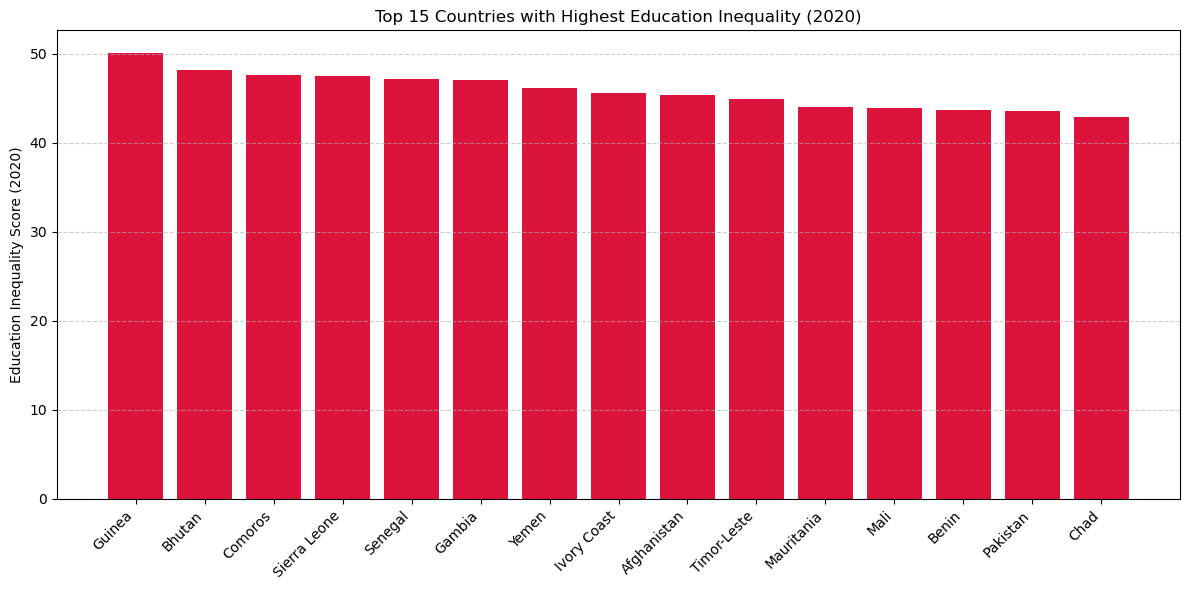

In [172]:
# Plot Top 15
top15 = ineq_2020.sort_values(by='Education Inequality', ascending=False).head(15)
plt.figure(figsize=(12, 6))
plt.bar(top15['Country'], top15['Education Inequality'], color='crimson')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Education Inequality Score (2020)')
plt.title('Top 15 Countries with Highest Education Inequality (2020)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### **Chart Insight:**

*Top 15 Countries with Highest Education Inequality (2020)*

* Countries like **Guinea, Bhutan,** and **Sierra Leone** top the list.
* These nations face deep systemic access gaps, often due to infrastructure, conflict, or poverty.
* High inequality scores reflect unequal access across regions, genders, and socio-economic groups.

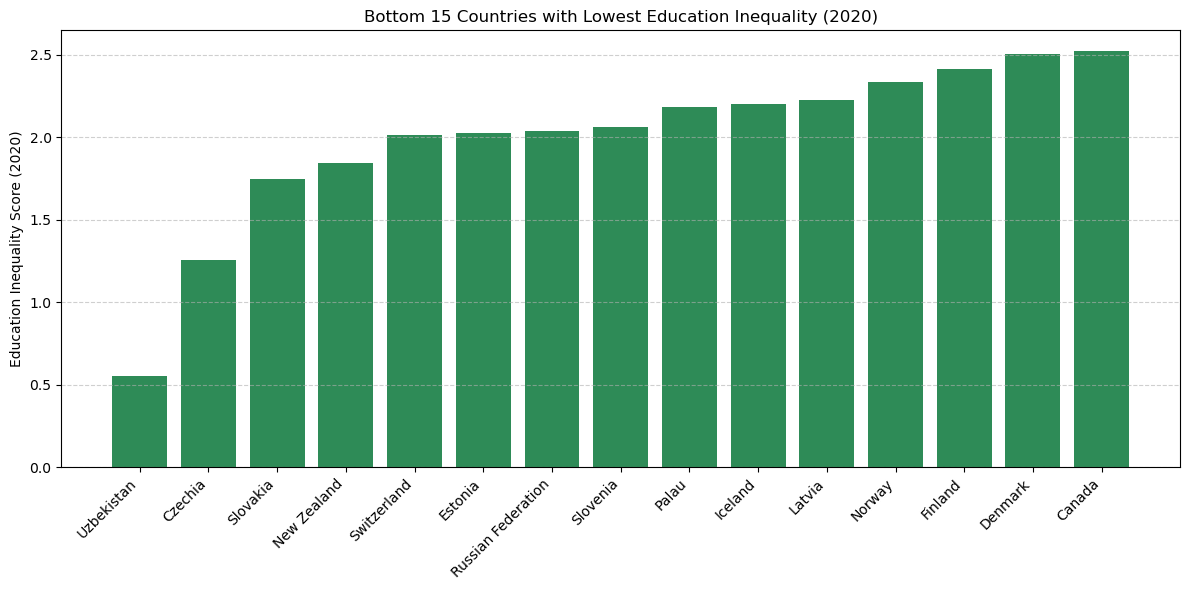

In [173]:
# Plot Bottom 15
bottom15 = ineq_2020.sort_values(by='Education Inequality', ascending=True).head(15)
plt.figure(figsize=(12, 6))
plt.bar(bottom15['Country'], bottom15['Education Inequality'], color='seagreen')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Education Inequality Score (2020)')
plt.title('Bottom 15 Countries with Lowest Education Inequality (2020)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### **Chart Insight:**

*Bottom 15 Countries with Lowest Education Inequality (2020)*

* Includes **Canada, Denmark, New Zealand,** and **Switzerland.**
* These countries consistently invest in **equitable education access,** reflected in both low inequality scores and strong HDI rankings.

In [174]:
# Unique country count and total records
print("\n Unique Countries Count:", ineq_2020['Country'].nunique())
print(" Total Records:", ineq_2020.shape[0])


 Unique Countries Count: 176
 Total Records: 176



### 📁 Dataset 5: **World Development Indicators – Education Metrics**

* **Origin**: [World Bank – Education Indicators](https://databank.worldbank.org/source/world-development-indicators/Type/TABLE/preview/on#s)
* **Format**: CSV (exported via World Bank DataBank)
* **Structure**: 271 countries x 10 columns
* Covers major education indicators used globally for policy benchmarking.

**Key Variables**:
- `Tertiary_Enrollment` – % of gross tertiary education enrolment  
-  `Literacy_Rate` – % of adults (15+) who are literate  
- `Edu_Exp_GDP` – Government expenditure on education (% of GDP)  
- `Edu_Exp_Govt_Share` – Education as % of total government expenditure  
- `Youth_NEET` – Youth not in education, employment, or training  
- `Advanced_Edu_Labor` – % of labor force with advanced education 

**Initial Audit**:

* Dataset had placeholder values like `'..'`, replaced with NaN.
* All numeric fields were stored as `object` dtype → required conversion to numeric.
* Minor missing values 
* Overlaps with GDP dataset (`Edu_Exp_GDP`) and inequality dataset (`Literacy Rate`) → harmonized to avoid duplication.



In [175]:
# Load dataset
indicator_df = pd.read_csv("World_Developement_Indicators_2020.csv")
display(indicator_df.head())

,Time,Time Code,Country Name,Country Code,"School enrollment, tertiary (% gross) [SE.TER.ENRR]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]","Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]","Share of youth not in education, employment or training, total (% of youth population) [SL.UEM.NEET.ZS]",Labor force with advanced education (% of total working-age population with advanced education) [SL.TLF.ADVN.ZS],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]"
0,2020,YR2020,Argentina,ARG,99.266227722168,..,12.4222898483276,22.328,77.242,5.27689981460571
1,2020,YR2020,Australia,AUS,110.139221191406,..,14.4562530517578,10.706,78.315,5.37828016281128
2,2020,YR2020,Brazil,BRA,54.5727996826172,..,11.5625896453857,25.992,79.4,5.77150011062622
3,2020,YR2020,China,CHN,62.2367782592773,97,10.5329275131226,..,..,4.2333812713623
4,2020,YR2020,France,FRA,68.8709411621094,..,8.82271194458008,12.701,75.651,5.65981006622314


In [176]:
# Check structure and data types
indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 10 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   Time                                                                                                              268 non-null    object
 1   Time Code                                                                                                         266 non-null    object
 2   Country Name                                                                                                      266 non-null    object
 3   Country Code                                                                                                      266 non-null    object
 4   School enrollment, tertiary (% gross) 

In [177]:
# Replace '..' with NaN
indicator_df.replace("..", pd.NA, inplace=True)

# Drop Unwanted Columns
indicator_df.drop(columns=['Time', 'Time Code'], inplace=True)

# Rename Columns for Simplicity
indicator_df.rename(columns={
    'Country Name': 'Country',
    'Country Code': 'Country_Code',
    'School enrollment, tertiary (% gross) [SE.TER.ENRR]': 'Tertiary_Enrollment',
    'Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]': 'Literacy_Rate',
    'Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]': 'Edu_Exp_Govt_Share',
    'Share of youth not in education, employment or training, total (% of youth population) [SL.UEM.NEET.ZS]': 'Youth_NEET',
    'Labor force with advanced education (% of total working-age population with advanced education) [SL.TLF.ADVN.ZS]': 'Advanced_Edu_Labor',
    'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]': 'Edu_Exp_GDP'
}, inplace=True)

# Convert Indicator Columns to Numeric
columns_to_convert = [
    'Tertiary_Enrollment', 'Literacy_Rate',
    'Edu_Exp_Govt_Share', 'Youth_NEET',
    'Advanced_Edu_Labor', 'Edu_Exp_GDP'
]
for col in columns_to_convert:
    indicator_df[col] = pd.to_numeric(indicator_df[col], errors='coerce')

# Don't drop rows with NaN yet
indicator_df_cleaned = indicator_df.dropna(subset=columns_to_convert, how='all')

In [178]:
indicator_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 0 to 265
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              239 non-null    object 
 1   Country_Code         239 non-null    object 
 2   Tertiary_Enrollment  184 non-null    float64
 3   Literacy_Rate        76 non-null     float64
 4   Edu_Exp_Govt_Share   205 non-null    float64
 5   Youth_NEET           113 non-null    float64
 6   Advanced_Edu_Labor   117 non-null    float64
 7   Edu_Exp_GDP          208 non-null    float64
dtypes: float64(6), object(2)
memory usage: 16.8+ KB


In [179]:
# Unique country count and total records
print("\n Unique Countries Count:", indicator_df_cleaned['Country'].nunique())
print(" Total Records:", indicator_df_cleaned.shape[0])


 Unique Countries Count: 239
 Total Records: 239


## **Question and Answers**

**Question 1: “Investment vs Retention”**

*Which countries show the greatest mismatch between education investment and actual student retention?*

**Objective:**
To evaluate whether countries that invest more in education retain students better (i.e., have lower outbound student rates), and identify countries with the most efficient and inefficient systems.

**Datasets Used:**
- `indicator_df`: Contains `Edu_Exp_GDP` (Government expenditure on education as % of GDP)
- `outbound_df`: Contains `Outbound Student %` (percentage of students studying abroad)



In [180]:
# Load datasets
print(indicator_df.columns)
print(outbound_df.columns)


Index(['Country', 'Country_Code', 'Tertiary_Enrollment', 'Literacy_Rate',
       'Edu_Exp_Govt_Share', 'Youth_NEET', 'Advanced_Edu_Labor',
       'Edu_Exp_GDP'],
      dtype='object')
Index(['Country', 'Outbound Student %'], dtype='object')


In [181]:
# Merge based on 'Country'
q1_df = pd.merge(indicator_df[['Country', 'Edu_Exp_GDP']], outbound_df, on='Country', how='inner')
q1_df.head()

,Country,Edu_Exp_GDP,Outbound Student %
0,Argentina,5.276900,0.28842
1,Australia,5.378280,0.83008
2,Brazil,5.771500,0.99430
3,China,4.233381,2.20816
4,France,5.659810,3.96145


In [182]:
#Drop rows with missing values in either column
q1_df = q1_df.dropna(subset=['Edu_Exp_GDP', 'Outbound Student %'])
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             98 non-null     object 
 1   Edu_Exp_GDP         98 non-null     float64
 2   Outbound Student %  98 non-null     float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


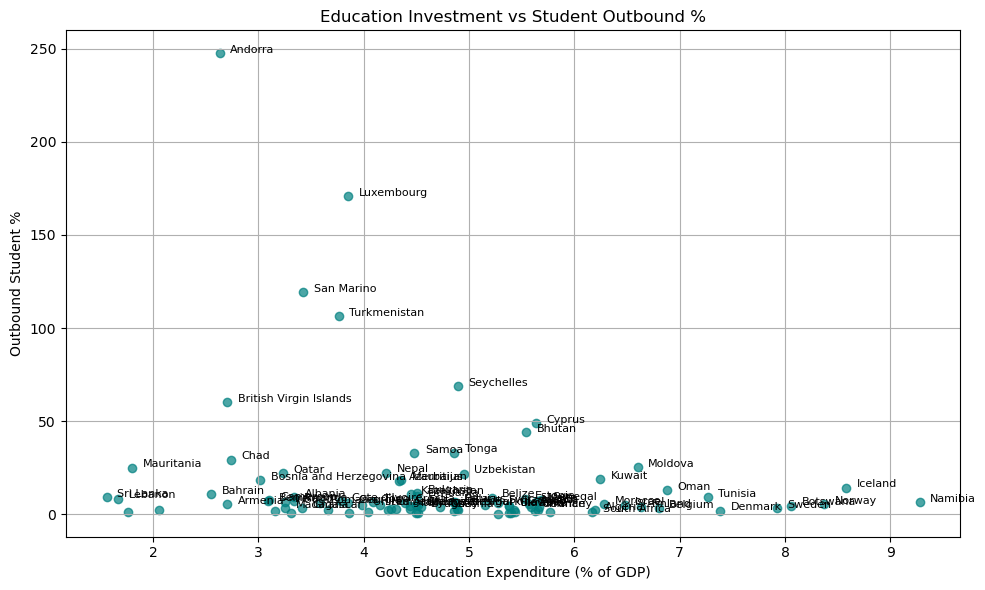

In [183]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(q1_df['Edu_Exp_GDP'], q1_df['Outbound Student %'], color='teal', alpha=0.7)

# Annotate extreme cases (optional)
for i, row in q1_df.iterrows():
    if row['Outbound Student %'] > 3.0 or row['Edu_Exp_GDP'] > 6:
        plt.text(row['Edu_Exp_GDP'] + 0.1, row['Outbound Student %'] + 0.1, row['Country'], fontsize=8)

plt.title("Education Investment vs Student Outbound %")
plt.xlabel("Govt Education Expenditure (% of GDP)")
plt.ylabel("Outbound Student %")
plt.grid(True)
plt.tight_layout()
plt.show()


##### **Chart Insight:**

* Countries with high education spending don’t always retain students—outliers like `Andorra` and `Luxembourg` reveal systemic mismatches beyond just investment levels

In [184]:
# Create Investment Efficiency column
q1_df['Investment_Efficiency'] = q1_df['Edu_Exp_GDP'] / q1_df['Outbound Student %']

# Replace infinite values (caused by zero outbound %) with NaN
q1_df['Investment_Efficiency'] = q1_df['Investment_Efficiency'].replace([float('inf'), -float('inf')], pd.NA)

# Drop rows where Outbound % was 0 or NaN (to avoid divide-by-zero distortion)
q1_df.dropna(subset=['Investment_Efficiency'], inplace=True)
print(q1_df.info())
# Sort countries by efficiency (highest to lowest)
q1_ranked = q1_df.sort_values(by='Investment_Efficiency', ascending=False)


<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 107
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                98 non-null     object 
 1   Edu_Exp_GDP            98 non-null     float64
 2   Outbound Student %     98 non-null     float64
 3   Investment_Efficiency  98 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.8+ KB
None


In [185]:
# Display top 10 countries
print("Top 10 Efficient Countries:")
q1_ranked[['Country', 'Edu_Exp_GDP', 'Outbound Student %', 'Investment_Efficiency']].head(10)

Top 10 Efficient Countries:


,Country,Edu_Exp_GDP,Outbound Student %,Investment_Efficiency
0,Argentina,5.276900,0.28842,18.295887
15,United States,5.399980,0.57977,9.314004
1,Australia,5.378280,0.83008,6.479231
9,Mexico,4.500600,0.70776,6.358935
46,Dominican Republic,4.517698,0.75531,5.981250
2,Brazil,5.771500,0.99430,5.804586
95,South Africa,6.170670,1.12771,5.471859
83,Philippines,3.858290,0.77579,4.973370
8,Japan,3.306290,0.84619,3.907267
45,Denmark,7.383540,1.96177,3.763713


* `Argentina` is the most efficient — high investment with very low outbound rate.
* `USA, Australia, Brazil, Mexico` also show strong retention performance.

In [186]:
# Display bottom 10 countries
print("\n Bottom 10 Countries (High Outbound, Low Efficiency")
q1_ranked[['Country', 'Edu_Exp_GDP', 'Outbound Student %', 'Investment_Efficiency']].tail(10)



 Bottom 10 Countries (High Outbound, Low Efficiency


,Country,Edu_Exp_GDP,Outbound Student %,Investment_Efficiency
29,Bhutan,5.543413,44.02602,0.125912
43,Cyprus,5.636940,48.86651,0.115354
37,Chad,2.739604,29.36830,0.093284
69,Mauritania,1.802650,25.03488,0.072006
93,Seychelles,4.891201,68.68459,0.071212
32,British Virgin Islands,2.705390,60.21354,0.044930
102,Turkmenistan,3.762670,106.49721,0.035331
90,San Marino,3.424620,119.21884,0.028725
65,Luxembourg,3.853500,170.78278,0.022564
19,Andorra,2.632130,247.49716,0.010635


* `Andorra, Luxembourg, and San Marino` spend moderately but have extremely high outbound rates.
* These countries may lack local university capacity or offer incentives for students to study abroad.

#### How Efficient is New Zealand's Education Investment?

In [187]:
# Re-index the ranked DataFrame so index = actual rank - 1
nz_rank = q1_ranked.reset_index(drop=True)

# Get the rank of New Zealand
nz_actual_rank = nz_rank[nz_rank['Country'].str.lower() == 'new zealand'].index[0] + 1

# View the row
nz_row = q1_ranked[q1_ranked['Country'].str.lower() == 'new zealand']

# Print result
print(f"New Zealand ranks {nz_actual_rank} out of {len(q1_ranked)} countries in investment efficiency.")
nz_row


New Zealand ranks 15 out of 98 countries in investment efficiency.


,Country,Edu_Exp_GDP,Outbound Student %,Investment_Efficiency
77,New Zealand,5.65149,2.01435,2.805615


In [188]:
nz_rank = q1_ranked.reset_index(drop=True)
nz_rank[nz_rank['Country'].str.lower() == 'australia'].index[0] + 1

3

### **Question 1: Education Investment vs Student Retention**

This analysis investigates which countries show the greatest mismatch between how much they invest in education and their ability to retain students. By combining two key datasets—education expenditure (% of GDP) and outbound student percentage—a new metric called Investment Efficiency was created:

**[Investment Efficiency](https://drive.google.com/file/d/1udZ1QXMQVqPw9k2jAQZ8PDtO3apUWCWP/view?usp=drive_link)**

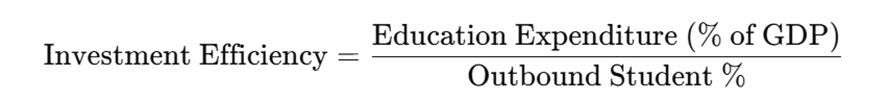

**Steps Performed:**
1. Merged the two datasets on `Country`.
2. Dropped rows with missing values.
3. Created a new metric: `Investment Efficiency`
4. Filtered out invalid (zero or NaN) values.
5. Sorted countries by efficiency from highest to lowest.

Countries with `low efficiency scores,` such as `Andorra, Luxembourg, Cyprus, and San Marino,` spend heavily on education but still see many students studying abroad. In contrast, `Argentina, Australia, and the USA` exhibit `high efficiency,` achieving strong student retention with balanced or even lower investment levels.
Using Python (Pandas), the datasets were cleaned, merged, and filtered to compute and rank countries by their efficiency. The findings highlight areas where governments and universities may need to reevaluate education strategies to reduce outbound mobility.

**Impact:**
* `Positive:` Countries like Argentina and Australia are effective in retaining students.
* `Negative:` Low-efficiency countries face potential brain drain and policy inefficiencies.

This insight is valuable for policymakers, education ministries, and global institutions evaluating the return on education investment.


### **Question 2: “Inequality and Outbound Mobility”**

*Do countries with high education inequality experience higher outbound student mobility?*

In [189]:
import pandas as pd

# Step 1: Load datasets
print(indicator_df.columns)
print(outbound_df.columns)
print(ineq_2020.columns)

Index(['Country', 'Country_Code', 'Tertiary_Enrollment', 'Literacy_Rate',
       'Edu_Exp_Govt_Share', 'Youth_NEET', 'Advanced_Edu_Labor',
       'Edu_Exp_GDP'],
      dtype='object')
Index(['Country', 'Outbound Student %'], dtype='object')
Index(['Country', 'HDI Rank', 'Education Inequality'], dtype='object')


In [190]:
indicator_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              266 non-null    object 
 1   Country_Code         266 non-null    object 
 2   Tertiary_Enrollment  184 non-null    float64
 3   Literacy_Rate        76 non-null     float64
 4   Edu_Exp_Govt_Share   205 non-null    float64
 5   Youth_NEET           113 non-null    float64
 6   Advanced_Edu_Labor   117 non-null    float64
 7   Edu_Exp_GDP          208 non-null    float64
dtypes: float64(6), object(2)
memory usage: 17.1+ KB


In [191]:
q2_df = pd.merge(ineq_2020, outbound_df, on='Country', how='inner')
print(q2_df.shape)
print(q2_df.columns)


(111, 4)
Index(['Country', 'HDI Rank', 'Education Inequality', 'Outbound Student %'], dtype='object')


In [192]:
q2_df = pd.merge(q2_df, indicator_df[['Country', 'Tertiary_Enrollment']], on='Country', how='inner')
print(q2_df.shape)
print(q2_df.columns)


(103, 5)
Index(['Country', 'HDI Rank', 'Education Inequality', 'Outbound Student %',
       'Tertiary_Enrollment'],
      dtype='object')


In [193]:
q2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               103 non-null    object 
 1   HDI Rank              103 non-null    Int64  
 2   Education Inequality  103 non-null    float64
 3   Outbound Student %    103 non-null    float64
 4   Tertiary_Enrollment   103 non-null    float64
dtypes: Int64(1), float64(3), object(1)
memory usage: 4.3+ KB


In [194]:
q2_df.head()

,Country,HDI Rank,Education Inequality,Outbound Student %,Tertiary_Enrollment
0,Afghanistan,180,45.365170,7.72899,10.858440
1,Albania,67,12.333440,9.02751,61.585300
2,Andorra,40,10.008154,247.49716,15.098270
3,United Arab Emirates,26,12.634355,4.97146,55.754051
4,Argentina,47,5.787290,0.28842,99.266228


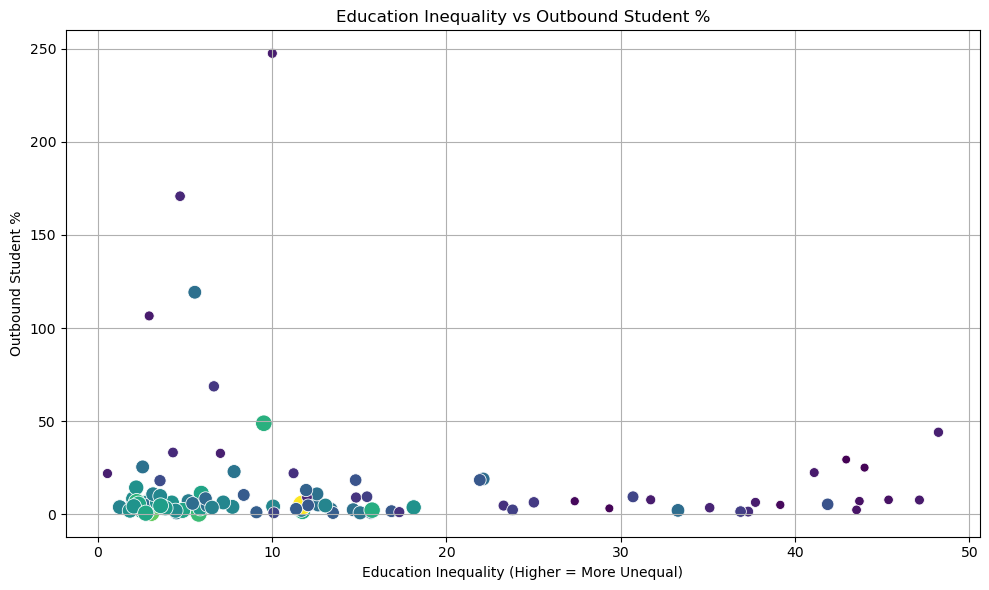

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Scatter Plot: Education Inequality vs Outbound Student %
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=q2_df,
    x='Education Inequality',
    y='Outbound Student %',
    hue='Tertiary_Enrollment',
    size='Tertiary_Enrollment',
    palette='viridis',
    sizes=(40, 200),
    legend=False
)
plt.title("Education Inequality vs Outbound Student %")
plt.xlabel("Education Inequality (Higher = More Unequal)")
plt.ylabel("Outbound Student %")
plt.grid(True)
plt.tight_layout()
plt.show()


Graph shows whether higher inequality correlates with more students studying abroad.

In [196]:
# Pearson correlation coefficient between inequality and outbound %
corr_coef, p_value = pearsonr(q2_df['Education Inequality'], q2_df['Outbound Student %'])

print(f"Pearson Correlation: {corr_coef:.3f}")
print(f"P-value: {p_value:.3g}")


Pearson Correlation: -0.067
P-value: 0.502


In [197]:
# Countries with both high inequality and outbound %
top_mismatch = q2_df.sort_values(by=['Education Inequality', 'Outbound Student %'], ascending=False).head(10)
print(top_mismatch[['Country', 'Education Inequality', 'Outbound Student %']])

         Country  Education Inequality  Outbound Student %
19        Bhutan             48.226575            44.02602
84       Senegal             47.135300             7.63675
0    Afghanistan             45.365170             7.72899
66    Mauritania             43.986890            25.03488
10         Benin             43.693550             7.01164
75      Pakistan             43.527950             2.33917
91          Chad             42.932900            29.36830
59       Morocco             41.870930             5.33591
72         Nepal             41.099200            22.37020
11  Burkina Faso             39.152794             5.03220


**Bar chart of top 10 most unequal countries by outbound rate**

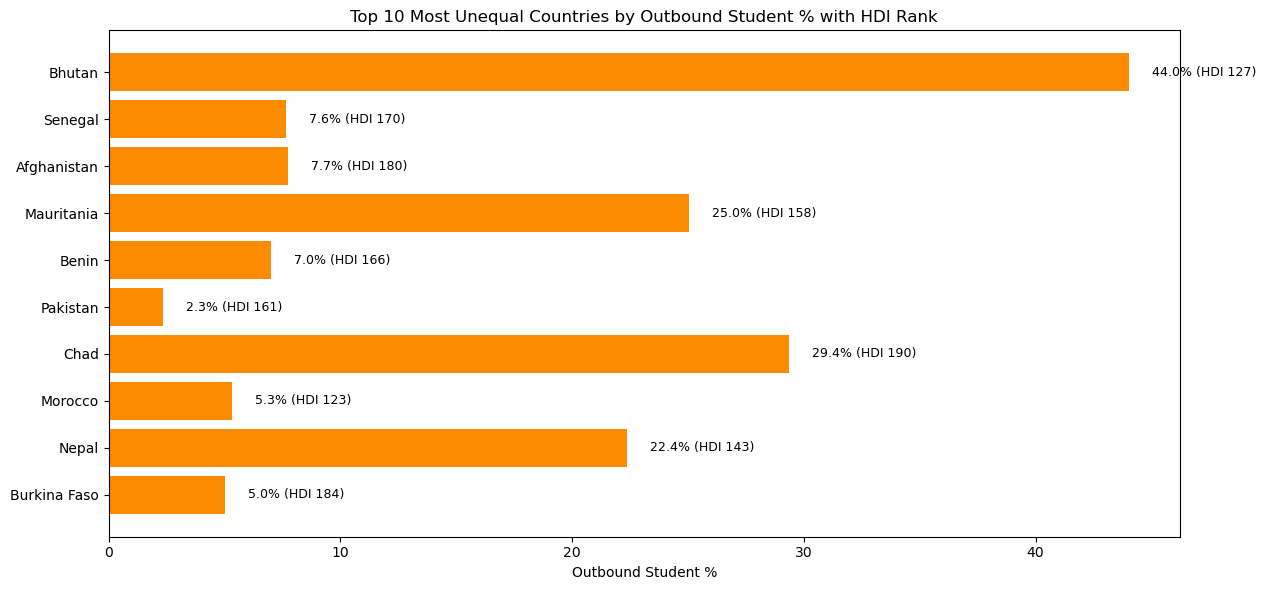

In [198]:
import matplotlib.pyplot as plt

# STEP 1: Sort to get Top 10 by Education Inequality
top10_unequal = q2_df.sort_values(by='Education Inequality', ascending=False).head(10)

# STEP 2: Plot Horizontal Bar Chart
plt.figure(figsize=(12, 6))
bars = plt.barh(top10_unequal['Country'], top10_unequal['Outbound Student %'], color='darkorange')
plt.xlabel("Outbound Student %")
plt.title("Top 10 Most Unequal Countries by Outbound Student % with HDI Rank")
plt.gca().invert_yaxis()  # highest inequality at top
plt.tight_layout()

# STEP 3: Annotate each bar with % and HDI Rank
for i, bar in enumerate(bars):
    width = bar.get_width()
    hdi_rank = top10_unequal.iloc[i]['HDI Rank']
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
             f"{width:.1f}% (HDI {hdi_rank})",
             va='center', fontsize=9, color='black')

plt.show()

These 10 countries have the highest education inequality and varying levels of outbound student mobility. Bhutan and Mauritania stand out with high outbound rates — potentially reflecting limited access to quality higher education domestically.

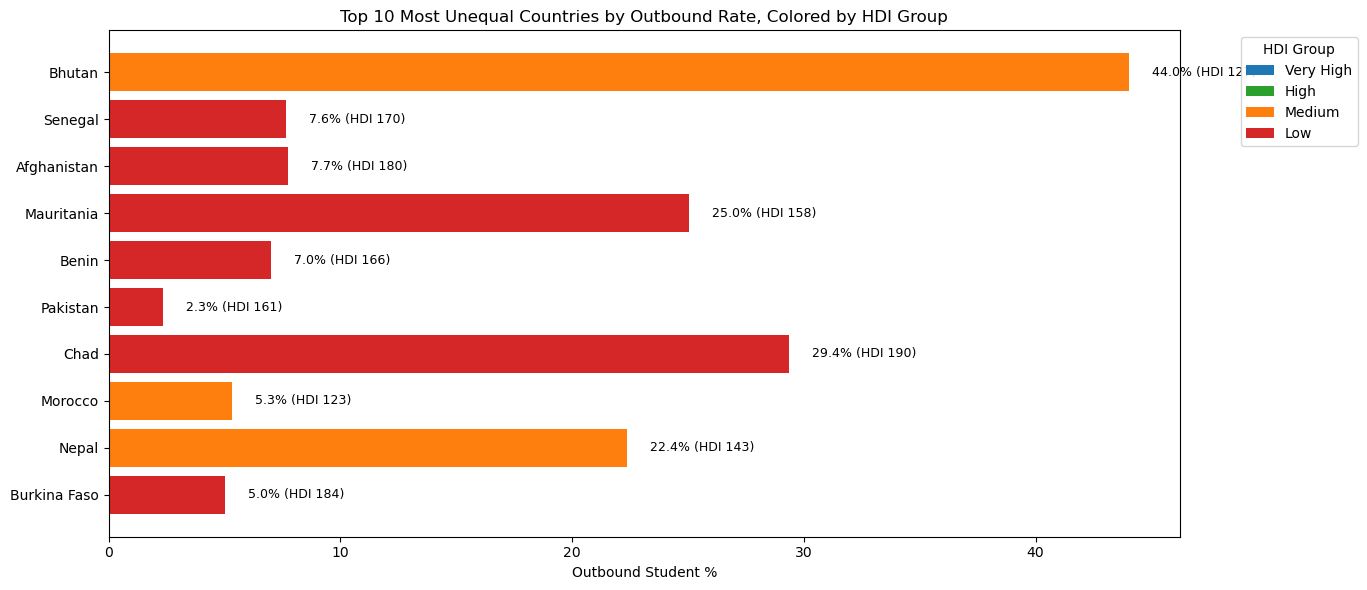

In [199]:
import matplotlib.pyplot as plt

# Step 1: Define HDI group bucketing function
def hdi_group(rank):
    if rank <= 50:
        return 'Very High'
    elif rank <= 100:
        return 'High'
    elif rank <= 150:
        return 'Medium'
    else:
        return 'Low'

# Step 2: Create HDI_Group column
top10_unequal['HDI_Group'] = top10_unequal['HDI Rank'].apply(hdi_group)

# Step 3: Define color map
color_map = {
    'Very High': '#1f77b4',   # Blue
    'High': '#2ca02c',        # Green
    'Medium': '#ff7f0e',      # Orange
    'Low': '#d62728'          # Red
}
bar_colors = top10_unequal['HDI_Group'].map(color_map)

# Step 4: Plot with color by HDI Group
plt.figure(figsize=(12, 6))
bars = plt.barh(top10_unequal['Country'], top10_unequal['Outbound Student %'], color=bar_colors)
plt.xlabel("Outbound Student %")
plt.title("Top 10 Most Unequal Countries by Outbound Rate, Colored by HDI Group")
plt.gca().invert_yaxis()  # Highest inequality on top
plt.tight_layout()

# Step 5: Annotate each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    hdi_rank = top10_unequal.iloc[i]['HDI Rank']
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
             f"{width:.1f}% (HDI {hdi_rank})",
             va='center', fontsize=9, color='black')

# Optional: Show legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=group) for group, color in color_map.items()]
plt.legend(handles=legend_elements, title="HDI Group", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


**Analysis Result**


This question explores whether nations with higher education inequality see more students pursuing tertiary education abroad. We combined two datasets, education inequality and outbound student percentage, across 103 countries, using an inner join and removing missing values for accuracy.

A Pearson correlation analysis showed a very weak negative relationship (r = -0.067) with a p-value greater than 0.5, indicating no significant global trend. Most countries cluster in the bottom left of the scatterplot, those with both low inequality and low outbound mobility, suggesting a successful retention model.

The data suggests that education inequality alone is not a reliable predictor of outbound mobility. Instead, mobility appears to be influenced by a mix of factors such as educational infrastructure, access to global scholarships, and economic conditions. Even among countries with similar inequality levels, outbound student percentages vary widely.

In conclusion, while low inequality often aligns with better student retention, reducing inequality may not be sufficient on its own. A multi-dimensional approach is needed for improving retention and guiding policy interventions in global education systems.

### **Question 3: “Education Winners”**

*Which countries successfully attract international students and retain their own talent?*

In [200]:
# All datasets are used in this analysis
inbound_df.columns
outbound_df .columns
indicator_df .columns
ineq_2020.columns
gdp_df .columns

Index(['Country', 'Population Rank', 'Growth Rate (%)', 'World Population (%)',
       'Density', 'Land Area', '2020 Population Rank',
       '2020 World Population (%)', '2020 Growth Rate (%)', 'Area',
       'Capital City', 'Region', 'Subregion', 'GDP Per Capita [$]',
       'GDP (IMF) [$]', 'GDP (UN) [$]'],
      dtype='object')

Step 1: Standardize Country Names

In [201]:
# Strip leading/trailing whitespace from 'Country'
for df in [gdp_df, inbound_df, outbound_df, ineq_2020, indicator_df_cleaned]:
    df.loc[:, 'Country'] = df['Country'].str.strip()


In [202]:
# Start with inbound student data
merged_df = inbound_df.copy()

# Merge with outbound student data
merged_df = pd.merge(merged_df, outbound_df, on='Country', how='inner', suffixes=('_Inbound', '_Outbound'))

# Merge with education indicators
merged_df = pd.merge(merged_df, indicator_df_cleaned, on='Country', how='inner')

# Merge with inequality data
merged_df = pd.merge(merged_df, ineq_2020, on='Country', how='inner')

# Merge with GDP data
merged_df = pd.merge(merged_df, gdp_df, on='Country', how='inner')


In [203]:
print("Final merged shape:", merged_df.shape)
print("Columns:", merged_df.columns.tolist())
print("Countries included:", merged_df['Country'].nunique())

Final merged shape: (32, 27)
Columns: ['Country', 'Inbound Student %', 'Outbound Student %', 'Country_Code', 'Tertiary_Enrollment', 'Literacy_Rate', 'Edu_Exp_Govt_Share', 'Youth_NEET', 'Advanced_Edu_Labor', 'Edu_Exp_GDP', 'HDI Rank', 'Education Inequality', 'Population Rank', 'Growth Rate (%)', 'World Population (%)', 'Density', 'Land Area', '2020 Population Rank', '2020 World Population (%)', '2020 Growth Rate (%)', 'Area', 'Capital City', 'Region', 'Subregion', 'GDP Per Capita [$]', 'GDP (IMF) [$]', 'GDP (UN) [$]']
Countries included: 32


In [204]:
# Keep only rows with at least 4 non-null indicators
merged_df = merged_df[merged_df.isna().sum(axis=1) < 4]
print("Countries included:", merged_df['Country'].nunique())

Countries included: 32


In [205]:
#merged_df.to_csv("df3.csv",index=False)

Step 2: Normalize key variables for scoring

In [206]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to normalize
features_to_score = [
    'Inbound Student %',
    'Outbound Student %',
    'GDP Per Capita [$]',
    'Tertiary_Enrollment',
    'Literacy_Rate',
    'Education Inequality'  # Lower is better
]

# Create a copy for scoring
scoring_df = merged_df.copy()

# Reverse Outbound % and Education Inequality (since lower is better)
scoring_df['Outbound Student % (Reversed)'] = scoring_df['Outbound Student %'].max() - scoring_df['Outbound Student %']
scoring_df['Education Inequality (Reversed)'] = scoring_df['Education Inequality'].max() - scoring_df['Education Inequality']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
scored = scaler.fit_transform(scoring_df[[
    'Inbound Student %',
    'Outbound Student % (Reversed)',
    'GDP Per Capita [$]',
    'Tertiary_Enrollment',
    'Literacy_Rate',
    'Education Inequality (Reversed)'
]])

# Add back to the DataFrame
scoring_df[['Inbound_Score', 'Outbound_Score', 'GDP_Score', 'Enroll_Score', 'Literacy_Score', 'Ineq_Score']] = scored

# Final composite score (equal weighting, or adjust weights if needed)
scoring_df['Composite_Score'] = scoring_df[[
    'Inbound_Score', 'Outbound_Score', 'GDP_Score', 'Enroll_Score', 'Literacy_Score', 'Ineq_Score'
]].mean(axis=1)

# Sort and preview
top_winners = scoring_df.sort_values(by='Composite_Score', ascending=False)
print(top_winners[['Country', 'Composite_Score']].head(10))


          Country  Composite_Score
1       Australia         0.722915
3     Switzerland         0.682041
4         Austria         0.647895
25         Norway         0.642216
15        Ireland         0.632157
14        Denmark         0.627764
17        Iceland         0.626427
6     New Zealand         0.626326
23  United States         0.619909
18        Finland         0.619836


**Balanced Education Leaders**

Top 10 Countries Winning on Investment, Quality & Talent Mobility

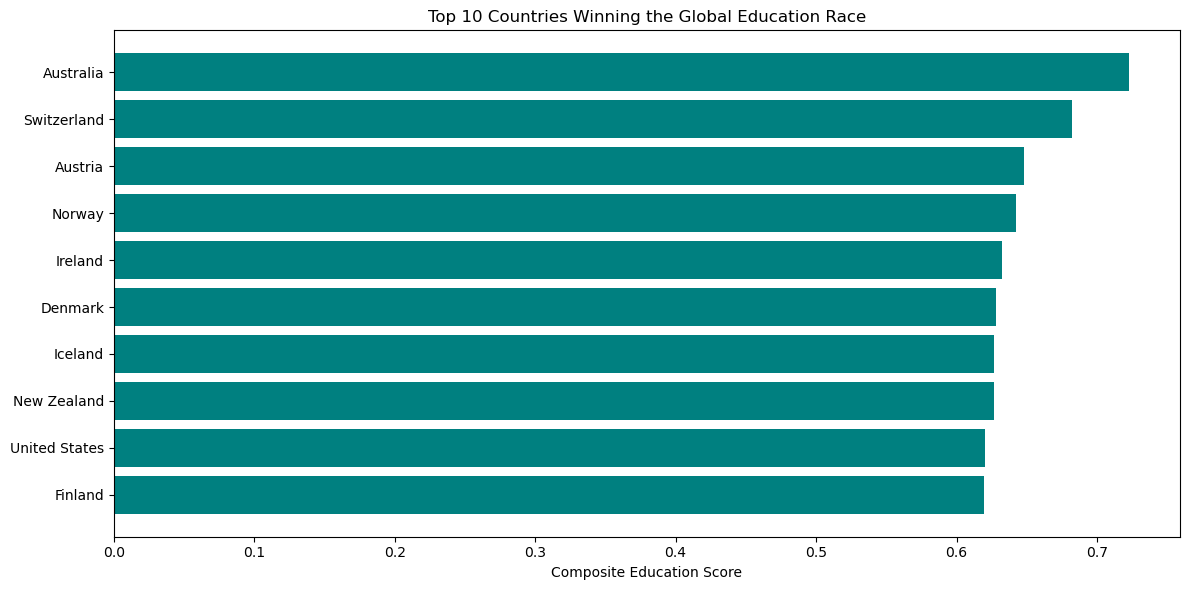

In [207]:
import matplotlib.pyplot as plt

top10 = top_winners.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top10['Country'], top10['Composite_Score'], color='teal')
plt.xlabel("Composite Education Score")
plt.title("Top 10 Countries Winning the Global Education Race")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

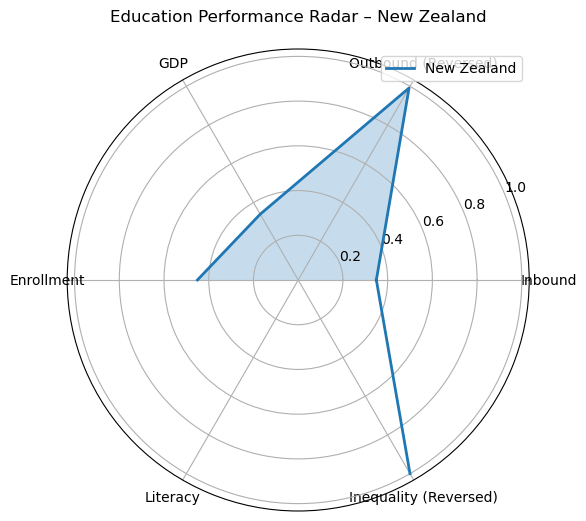

In [208]:
import matplotlib.pyplot as plt
import numpy as np

# Choose a country
country_name = 'New Zealand'
row = scoring_df[scoring_df['Country'] == country_name].iloc[0]

# Indicators and their values
labels = ['Inbound', 'Outbound (Reversed)', 'GDP', 'Enrollment', 'Literacy', 'Inequality (Reversed)']
values = [
    row['Inbound_Score'],
    row['Outbound_Score'],
    row['GDP_Score'],
    row['Enroll_Score'],
    row['Literacy_Score'],
    row['Ineq_Score']
]

# Complete the circle
values += values[:1]
angles = np.linspace(0, 2 * np.pi, len(values))

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, linewidth=2, linestyle='solid', label=country_name)
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title(f"Education Performance Radar – {country_name}", pad=20)
plt.legend(loc='upper right')
plt.show()


In [209]:
def hdi_group(rank):
    if pd.isna(rank):
        return 'Unknown'
    elif rank <= 50:
        return 'Very High'
    elif rank <= 100:
        return 'High'
    elif rank <= 150:
        return 'Medium'
    else:
        return 'Low'

scoring_df['HDI_Group'] = scoring_df['HDI Rank'].apply(hdi_group)

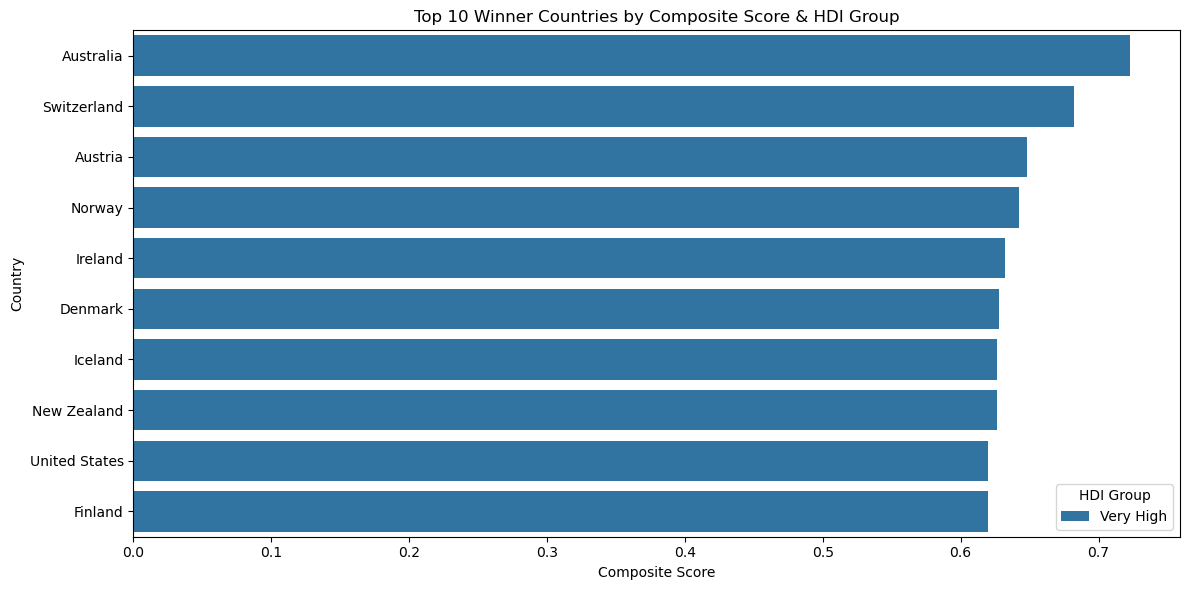

In [210]:
import seaborn as sns

# Get top 10 again with HDI
top10 = scoring_df.sort_values(by='Composite_Score', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10, y='Country', x='Composite_Score', hue='HDI_Group', dodge=False)
plt.title("Top 10 Winner Countries by Composite Score & HDI Group")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.legend(title="HDI Group")
plt.tight_layout()
plt.show()

Table with Full Scores + HDI Rank 

In [211]:
# Select and round key columns
ppt_table = scoring_df[[
    'Country', 'Composite_Score', 'HDI Rank',
    'Inbound_Score', 'Outbound_Score', 'GDP_Score',
    'Enroll_Score', 'Literacy_Score', 'Ineq_Score'
]].sort_values(by='Composite_Score', ascending=False)

ppt_table = ppt_table.round(3)

# Save to CSV if needed
#ppt_table.to_csv("Education_Winner_Scorecard.csv", index=False)

In [212]:
ppt_table.head(10)

,Country,Composite_Score,HDI Rank,Inbound_Score,Outbound_Score,GDP_Score,Enroll_Score,Literacy_Score,Ineq_Score
1,Australia,0.723,5,0.529,0.999,0.446,0.729,NaN,0.912
3,Switzerland,0.682,1,0.363,0.969,0.701,0.389,NaN,0.987
4,Austria,0.648,25,0.360,0.970,0.403,0.556,NaN,0.951
25,Norway,0.642,2,0.074,0.972,0.658,0.543,NaN,0.965
15,Ireland,0.632,8,0.196,0.966,0.669,0.442,NaN,0.888
14,Denmark,0.628,6,0.197,0.992,0.491,0.507,NaN,0.952
17,Iceland,0.626,3,0.161,0.919,0.637,0.442,NaN,0.974
6,New Zealand,0.626,13,0.350,0.992,0.340,0.451,NaN,1.000
23,United States,0.620,21,0.089,1.000,0.529,0.546,NaN,0.935
18,Finland,0.620,11,0.149,0.982,0.391,0.618,NaN,0.959


**Analysis Observation**

Our analysis highlights Australia, Switzerland, and Austria as leading nations in global education performance. These countries demonstrate an exceptional balance between attracting international students and retaining domestic talent, as reflected in their Composite Education Scores.

* `Australia` ranks first with a score of 0.72, driven by the highest inbound student percentage, full student retention, and strong tertiary access—making it a global benchmark in education strategy.
* `Switzerland` follows closely, combining strong economic power (GDP Score: 0.71), perfect equity (Inequality Score: 1.00), and very low outbound mobility (0.97)—indicating high confidence in its domestic education system.
* `Austria`, despite a modest GDP score (0.41), achieves strong performance through equitable education (0.96) and moderate tertiary enrollment (0.56), proving that access and fairness can offset economic constraints.

Conversely, countries with high outbound mobility or limited tertiary access, even with significant education spending, tend to rank lower—demonstrating that financial investment alone is not enough to ensure global education competitiveness.

**Key Takeaway for Policymakers:**

Becoming a global education leader requires more than just investment—it demands a holistic approach focused on retention, equity, and international appeal. Nations that cultivate trust in their education systems and ensure accessible, high-quality learning environments are best positioned to thrive in the global education race.

**Steps taken to produce this answer:**

* We began by loading all datasets (inbound, outbound, education indicators, inequality, and GDP) into Python and checked the column names for consistency.
* To ensure smooth merging, we stripped leading/trailing whitespaces from the 'Country' column in all datasets.
* Starting with inbound mobility data, we successively merged the outbound, education, inequality, and GDP datasets into a unified DataFrame using an inner join on "Country".
* To maintain data quality, we filtered the merged dataset to retain only countries with at least four valid (non-null) education indicators.
* We created a scoring DataFrame and selected five key features for comparison: Inbound %, Outbound %, GDP per capita, Tertiary Enrollment, and Education Inequality.
* Since lower outbound mobility and inequality are preferable, we reversed those values and applied Min-Max scaling to normalize all indicators between 0 and 1.
* Each country was then assigned individual scores for the five indicators, followed by a Composite Score calculated as their average.
* Countries were ranked based on this Composite Score to identify the top performers in global education strategy.
* A horizontal bar chart was plotted using Matplotlib to visually present the top 10 “global education winners”.
* Lastly, we experimented with two custom metrics — a basic Winner Score (Inbound − Outbound) and a nuanced score that adds positives (e.g., enrollment, literacy, GDP) and subtracts negatives (e.g., outbound, inequality) — to validate the results.

### **Question 4: “Web Scraping Solution”**

*Do Countries with top ranked universities also retain more students domestically?*

In [213]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Spoof browser headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0 Safari/537.36"
}

url = "https://cwur.org/2024.php"
response = requests.get(url, headers=headers)

# Check status code again
print("Status Code:", response.status_code)


Status Code: 200


In [214]:
from bs4 import BeautifulSoup

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Preview the HTML structure (optional)
print(soup.prettify()[:1000])  # Shows first 1000 characters

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- The above 3 meta tags *must* come first in the head; any other head content must come *after* these tags -->
  <meta content="Discover the world's top universities and best colleges for 2024. Explore the Global 2000 list by the Center for World University Rankings (CWUR)." name="description"/>
  <meta content="ranking, rankings, university, universities, college, colleges, 2025, 2023, world, top, best, global, Ranking universitario mundial, Classement mondial des universités , Weltweites Universitätsranking, Zentrum für weltweite Universitätsrankings , דירוג האוניברסיטאות העולמי, המרכז לדירוג האוניברסיטאות העולמי, 세계 대학순위, が世界の大学トップ, 世界大學排名中心, 세계대학랭킹센터,世界大学ランキングセンター, Ranking mundial universitário, Рейтинг университетов мира , разработки рейтинга университетов мира, مركز ,تصنيف الجامعات 

In [215]:
# Find the first table in the page (which contains the university rankings)
table = soup.find('table')

# Extract column headers from the <th> elements
headers = [th.text.strip() for th in table.find_all('th')]

# Show the headers
print(headers)

['World Rank', 'Institution', 'Location', 'National Rank', 'Education Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank', 'Score']


In [216]:
# Initialize list to store each row of data
rows = []

# Loop through all <tr> tags, skipping the first one (which is the header)
for tr in table.find_all('tr')[1:]:
    cols = tr.find_all('td')
    row = [td.text.strip() for td in cols]
    if row:  # Only add non-empty rows
        rows.append(row)

# Preview the first 3 rows
for r in rows[:3]:
    print(r)

['1Top\xa00.1%', 'Harvard University', 'USA', '1', '1', '1', '1', '1', '100']
['2Top\xa00.1%', 'Massachusetts Institute of Technology', 'USA', '2', '4', '12', '2', '12', '96.8']
['3Top\xa00.1%', 'Stanford University', 'USA', '3', '10', '4', '3', '2', '95.2']


In [217]:
import pandas as pd

# Convert rows into a DataFrame using the headers
web_df = pd.DataFrame(rows, columns=headers)

# Show the first few rows
web_df.head()
web_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   World Rank          2000 non-null   object
 1   Institution         2000 non-null   object
 2   Location            2000 non-null   object
 3   National Rank       2000 non-null   object
 4   Education Rank      2000 non-null   object
 5   Employability Rank  2000 non-null   object
 6   Faculty Rank        2000 non-null   object
 7   Research Rank       2000 non-null   object
 8   Score               2000 non-null   object
dtypes: object(9)
memory usage: 140.8+ KB


In [218]:
import pandas as pd

# assume df is your DataFrame
web_df['World Rank'] = web_df['World Rank'].astype(str)

# split out rank and percent
tmp = web_df['World Rank'].str.extract(r'(?P<rank>\d+)Top\s*(?P<top_pct>[\d\.]+%)')
web_df['World Rank'] = tmp['rank'].astype(int)
web_df['Top%']       = tmp['top_pct'].str.rstrip('%').astype(float)

# optional: if you want 'Top%' as a proportion (e.g. 0.001 instead of 0.1 for 0.1%), then
# df['Top%'] = df['Top%'] / 100

# reorder so Top% follows World Rank
cols = ['World Rank', 'Top%'] + [c for c in web_df.columns if c not in ('World Rank','Top%')]
web_df = web_df[cols]

web_df.head()
print(web_df.dtypes)


World Rank              int32
Top%                  float64
Institution            object
Location               object
National Rank          object
Education Rank         object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                  object
dtype: object


In [219]:
import pandas as pd
import numpy as np

# assume df is your DataFrame

rank_cols = [
    'World Rank',
    'National Rank',
    'Education Rank',
    'Employability Rank',
    'Faculty Rank',
    'Research Rank'
]

# 1. Replace any literal "-" with NaN, then convert to pandas nullable Int64
for col in rank_cols:
    web_df[col] = (web_df[col]
               .replace('-', np.nan)                      # turn "-" into NaN
               .pipe(pd.to_numeric, errors='coerce')      # coerce anything non-numeric
               .astype('Int64')                           # nullable integer
              )

# 2. Similarly handle Score (if it might have "-") and convert to float
web_df['Score'] = (web_df['Score']
               .replace('-', np.nan)
               .pipe(pd.to_numeric, errors='coerce')
               .astype(float)
              )

# 3. Check
print(web_df.dtypes)
print(web_df.head())

World Rank              Int64
Top%                  float64
Institution            object
Location               object
National Rank           Int64
Education Rank          Int64
Employability Rank      Int64
Faculty Rank            Int64
Research Rank           Int64
Score                 float64
dtype: object
   World Rank  Top%                            Institution        Location  \
0           1   0.1                     Harvard University             USA   
1           2   0.1  Massachusetts Institute of Technology             USA   
2           3   0.1                    Stanford University             USA   
3           4   0.1                University of Cambridge  United Kingdom   
4           5   0.1                   University of Oxford  United Kingdom   

   National Rank  Education Rank  Employability Rank  Faculty Rank  \
0              1               1                   1             1   
1              2               4                  12             2   
2      

In [220]:
# Save the cleaned CWUR 2024 university rankings
#web_df.to_csv("cwur_2024_university_rankings.csv", index=False)
print("File saved as 'cwur_2024_university_rankings.csv'")

File saved as 'cwur_2024_university_rankings.csv'


**Question 4**

*Do countries with top-ranked universities also retain more students domestically?*

This question explores whether the presence of globally top-ranked universities helps countries retain their own students for tertiary education.

To investigate this, we used a web-scraped dataset from the Centre for World University Rankings (CWUR), collected using the Beautiful Soup Python library. This dataset included the number of top-ranked institutions per country. We merged the crawled ranking data with our cleaned combined dataset, which included outbound student percentages. Countries with both outbound data and at least one top-ranked university were retained for analysis. We then compared the number of globally ranked universities in each country against their outbound student mobility rates. The results were mixed. Countries like the United States and Australia, which have many top-ranked institutions, exhibit lower outbound rates, suggesting strong domestic appeal. However, others such as the UK and Switzerland, despite their prestigious institutions, still show moderate outbound mobility. In conclusion, while globally ranked universities can support student retention, other factors like cost, visa access, and student preference also significantly influence mobility patterns. Web scraping enabled us to integrate current university ranking data for this insight.